In [82]:
'''
ECSE 556 Homework 1
Clustering
Gian Favero
October 6th, 2023
'''

# Common imports
import numpy as np

# import data
data = np.genfromtxt('Data/gdsc_expr_postCB.csv', delimiter=',')
data = data[1:,1:]
data = np.transpose(data)

# Comment out for unscaled data
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(data)\ndata = scaler.transform(data)'

# Clustering

Agglomerative Clustering

In [83]:
from sklearn.cluster import AgglomerativeClustering

# Construct the clustering object
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the data
agglomerative_clustering.fit(data)

# Get the labels
agglo_labels = agglomerative_clustering.labels_

K-Means Clustering

In [84]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Construct the clustering object
k_means = KMeans(n_clusters=3)

# Fit the data
k_means.fit(data)

# Get the labels and cluster centers
k_cluster_centers = k_means.cluster_centers_
k_labels = k_means.labels_

Similarities

+---------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Default) |
+------------+------------+------------+------------+
|            | Cluster 1  | Cluster 2  | Cluster 3  |
+------------+------------+------------+------------+
| Cluster 1  |   0.019    |    0.0     |   0.858    |
| Cluster 2  |   0.888    |    0.0     |   0.049    |
| Cluster 3  |    0.0     |    1.0     |    0.0     |
+------------+------------+------------+------------+
+---------------------------------------------+
| Number of Samples in Each Cluster (Default) |
+-------------+------------------+------------+
|   Cluster   |  Agglomerative   |  K-Means   |
+-------------+------------------+------------+
|  Cluster 1  |       445        |    341     |
|  Cluster 2  |       169        |    469     |
|  Cluster 3  |       365        |    169     |
+-------------+------------------+------------+
Rand Score:  0.915
Adjusted Rand Score:  0.819


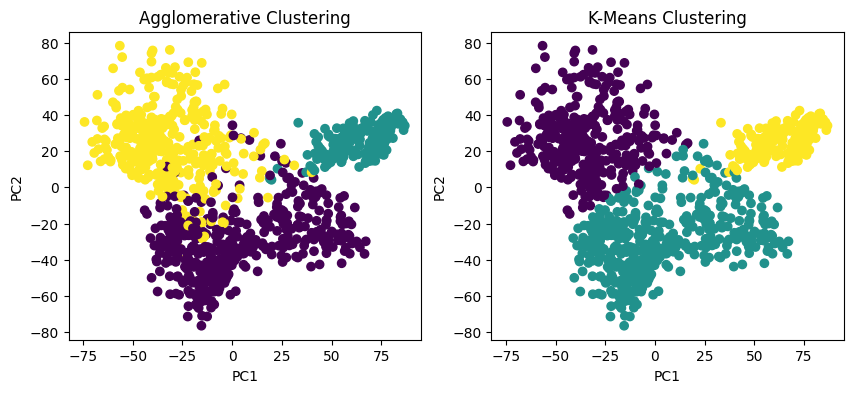

In [85]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
import prettytable as pt

# Jaccard score for each pair of clusters
jaccards = []
for i in range(3):
    for j in range(3):
        jaccards.append(jaccard_score(agglo_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
default_t = pt.PrettyTable()
default_t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
default_t.title = 'Jaccard Score for Each Pair of Clusters (Default)'

for i in range(3):
    default_t.add_row([f'Cluster {i+1}', jaccards[i], jaccards[i+3], jaccards[i+6]])

print(default_t)

# Make table comparing number of samples in each cluster for both clustering methods
default_prop_t = pt.PrettyTable()
default_prop_t.field_names = ['Cluster', 'Agglomerative', 'K-Means']
default_prop_t.title = 'Number of Samples in Each Cluster (Default)'
default_prop_t.add_row(['Cluster 1', np.count_nonzero(agglo_labels == 0), np.count_nonzero(k_labels == 0)])
default_prop_t.add_row(['Cluster 2', np.count_nonzero(agglo_labels == 1), np.count_nonzero(k_labels == 1)])
default_prop_t.add_row(['Cluster 3', np.count_nonzero(agglo_labels == 2), np.count_nonzero(k_labels == 2)])

print(default_prop_t)

# Rand score for agglomerative and k-means clustering
def_rand = rand_score(agglo_labels, k_labels).round(3)
print("Rand Score: ", def_rand)

# Adjusted rand score for agglomerative and k-means clustering
def_adj_rand = adjusted_rand_score(agglo_labels, k_labels).__round__(3)
print("Adjusted Rand Score: ", def_adj_rand)

# Visualize results 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# Plot agglomerative clustering results
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(data_pca[:,0], data_pca[:,1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot k-means clustering results
plt.subplot(122)
plt.scatter(data_pca[:,0], data_pca[:,1], c=k_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#### Analysis of Agglomerative Clustering

Similarity between the two Agglomerative distances

+-----------------------------------------------+
|    Jaccard Score for Each Pair of Clusters    |
+-----------+-----------+-----------+-----------+
|           | Cluster 1 | Cluster 2 | Cluster 3 |
+-----------+-----------+-----------+-----------+
| Cluster 1 |    1.0    |    0.0    |    0.0    |
| Cluster 2 |    0.0    |    1.0    |    0.0    |
| Cluster 3 |    0.0    |    0.0    |    1.0    |
+-----------+-----------+-----------+-----------+
+---------------------------------------------+
| Number of Samples in Each Cluster (Default) |
+---------------+---------------+-------------+
|    Cluster    |   Euclidean   |    Cosine   |
+---------------+---------------+-------------+
|   Cluster 1   |      972      |     972     |
|   Cluster 2   |       1       |      1      |
|   Cluster 3   |       6       |      6      |
+---------------+---------------+-------------+
Rand Score:  1.0
Adjusted Rand Score:  1.0


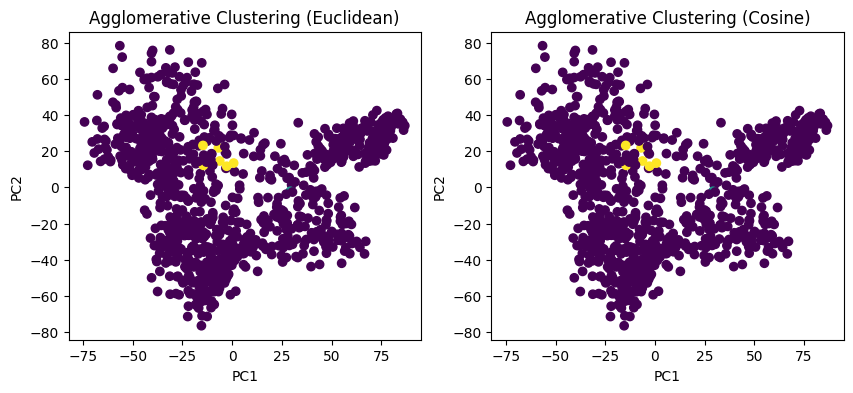

In [86]:
# Eucledian distance
euc_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
euc_agglo.fit(data)
euc_labels = euc_agglo.labels_

# Cosine distance
cos_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
cos_agglo.fit(data)
cos_labels = cos_agglo.labels_

# Jaccard score for each pair of clusters
average_jaccards = []
for i in range(3):
    for j in range(3):
        average_jaccards.append(jaccard_score(euc_labels == i, cos_labels == j).round(3))

# Make table of jaccard scores
t = pt.PrettyTable()
t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
t.title = 'Jaccard Score for Each Pair of Clusters'

for i in range(3):
    t.add_row([f'Cluster {i+1}', average_jaccards[i], average_jaccards[i+3], average_jaccards[i+6]])

print(t)

# Make table comparing number of samples in each cluster for both clustering methods
comp_prop_t = pt.PrettyTable()
comp_prop_t.field_names = ['Cluster', 'Euclidean', 'Cosine']
comp_prop_t.title = 'Number of Samples in Each Cluster (Default)'
comp_prop_t.add_row(['Cluster 1', np.count_nonzero(euc_labels == 0), np.count_nonzero(cos_labels == 0)])
comp_prop_t.add_row(['Cluster 2', np.count_nonzero(euc_labels == 1), np.count_nonzero(cos_labels == 1)])
comp_prop_t.add_row(['Cluster 3', np.count_nonzero(euc_labels == 2), np.count_nonzero(cos_labels == 2)])

print(comp_prop_t)

# Rand score
euc_cos_rand = rand_score(euc_labels, cos_labels).__round__(3)
print("Rand Score: ", euc_cos_rand)

# Adjusted rand score
euc_cos_adj_rand = adjusted_rand_score(euc_labels, cos_labels).__round__(3)
print("Adjusted Rand Score: ", euc_cos_adj_rand)

# Visualize results 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# Plot agglomerative clustering results with euclidean distance and cosine distance
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(data_pca[:,0], data_pca[:,1], c=euc_labels, cmap='viridis')
plt.title('Agglomerative Clustering (Euclidean)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(122)
plt.scatter(data_pca[:,0], data_pca[:,1], c=cos_labels, cmap='viridis')
plt.title('Agglomerative Clustering (Cosine)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()